<a href="https://colab.research.google.com/github/bartiralira/bootcampIA/blob/main/BootCamp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Participantes (RM - NOME):***<br>
Vitor Luiz Carvalhal - 337129<br>
Ricardo Fabbro Antonelli - 339505<br>
Bartira Lira Lafiandre - 340177<br>
Tiago Batista Pessoa - 339575<br>


## **0.Biblioteca e afins**



In [312]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!pip install missingno
import missingno as msno
import seaborn as sbs
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


## **1.Analisando os dados**

In [227]:
url = 'https://raw.githubusercontent.com/bartiralira/bootcampIA/a0095c50dfa059f29ebb71a6afaf19f7bbdfc95a/solicitacoescredito.csv'
dfo=pd.read_csv(url, engine='python')
dfo.head()

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,definicaoRisco,diferencaPercentualRisco,percentualRisco,dashboardCorrelacao,valorAprovado,dataAprovadoEmComite,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,totalPatrimonioLiquido,endividamento,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252,0.000,2015-12-10T00:00:00,0,0.000,50000.000,AprovadoAnalista,De 11 a 30 % - Baixo,0.717,0.283,0.000,50000.000,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,1766880.000,0.000,12.000,0.000,2003.000,Acima de 17 anos,90000.000,False,True,1.000,43200.000,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000,nan,2019-06-12T17:28:31,0,0.000,10000.000,DocumentacaoReprovada,De 0 a 10 % - Muito Baixo,1.000,0.000,0.000,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,NaN,NaN,0.000,nan,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.625,0.000,2019-11-27T00:00:00,0,0.000,20000.000,AprovadoAnalista,De 11 a 30 % - Baixo,0.717,0.283,0.000,20000.000,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,2814940.000,0.000,7.000,0.000,2014.000,De 6 a 10 anos,20000.000,False,True,1.000,4320.000,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000,nan,2017-02-13T17:20:27,0,0.000,25000.000,AprovadoAnalista,De 51 a 80 % - Alto,0.396,0.604,0.486,15000.000,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,1285274.000,0.000,12.000,0.000,2013.000,De 6 a 10 anos,30000.000,False,True,0.000,5920.000,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454,0.000,2010-07-13T00:00:00,20,1486.950,50000.000,AprovadoAnalista,De 11 a 30 % - Baixo,0.830,0.170,0.000,50000.000,NaN,2019-09-30T00:00:00,14758917.000,12149031.000,25793410.000,14544378.000,3039112.000,11797928.000,3047791.000,40779757.000,81459809.000,9.000,40680051.000,2002.000,Acima de 17 anos,75000.000,False,False,1.000,89000.000,2020-02-04T15:06:28


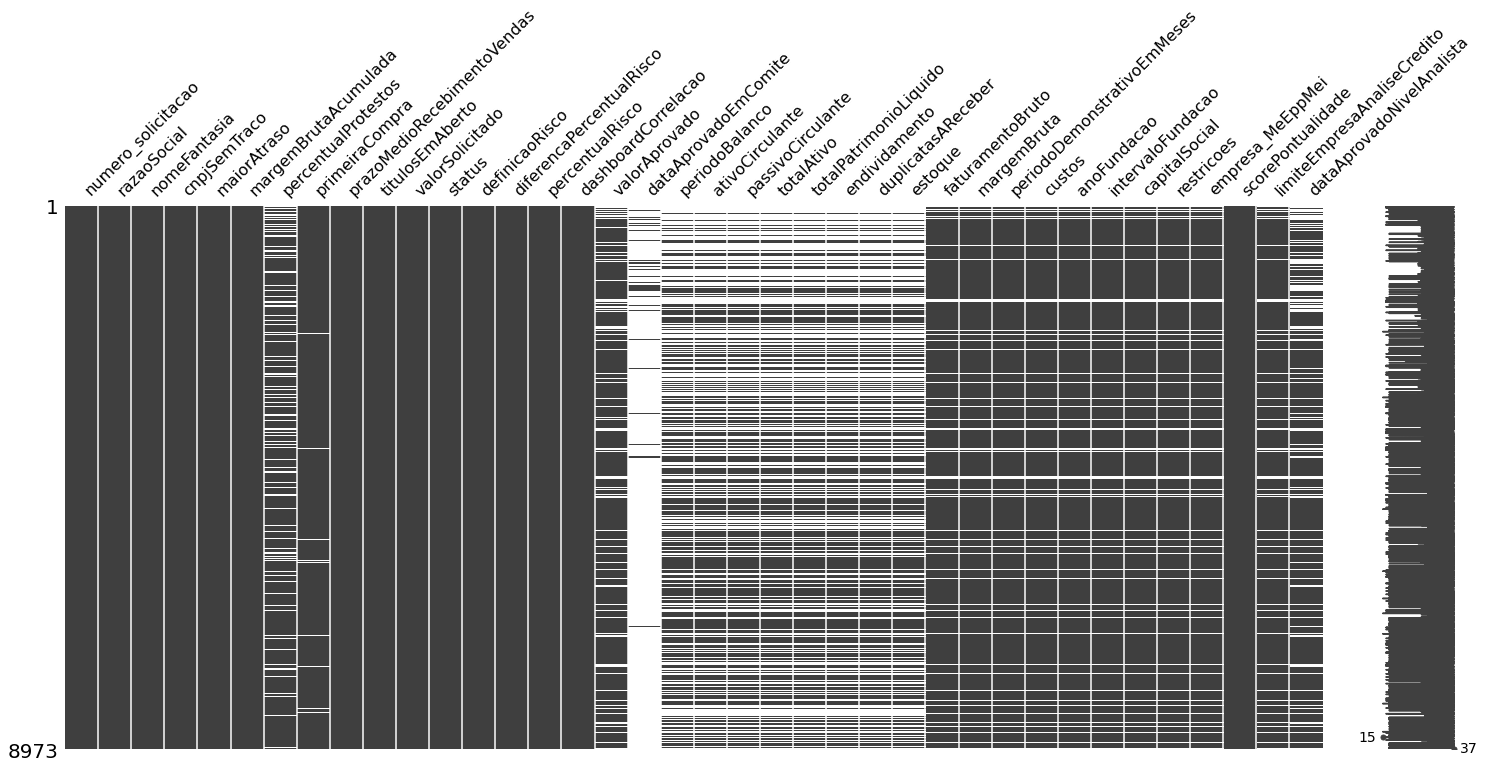

In [73]:
%matplotlib inline
msno.matrix(dfo)

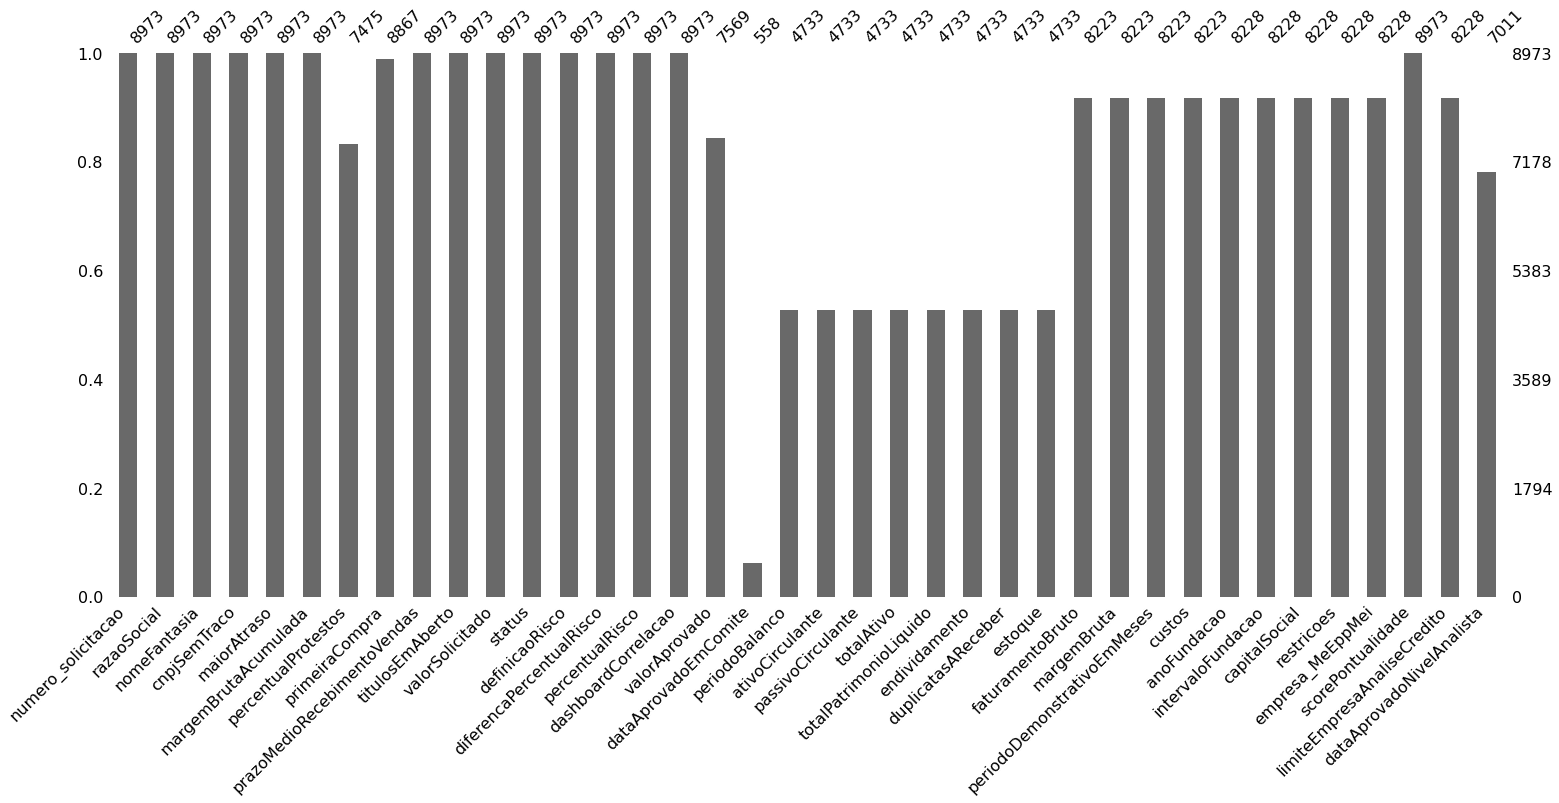

In [74]:
%matplotlib inline
msno.bar(dfo)

AxesSubplot(0.125,0.3515;0.775x0.5285) 



Text(0.5, 1.0, 'Correlation matrix')

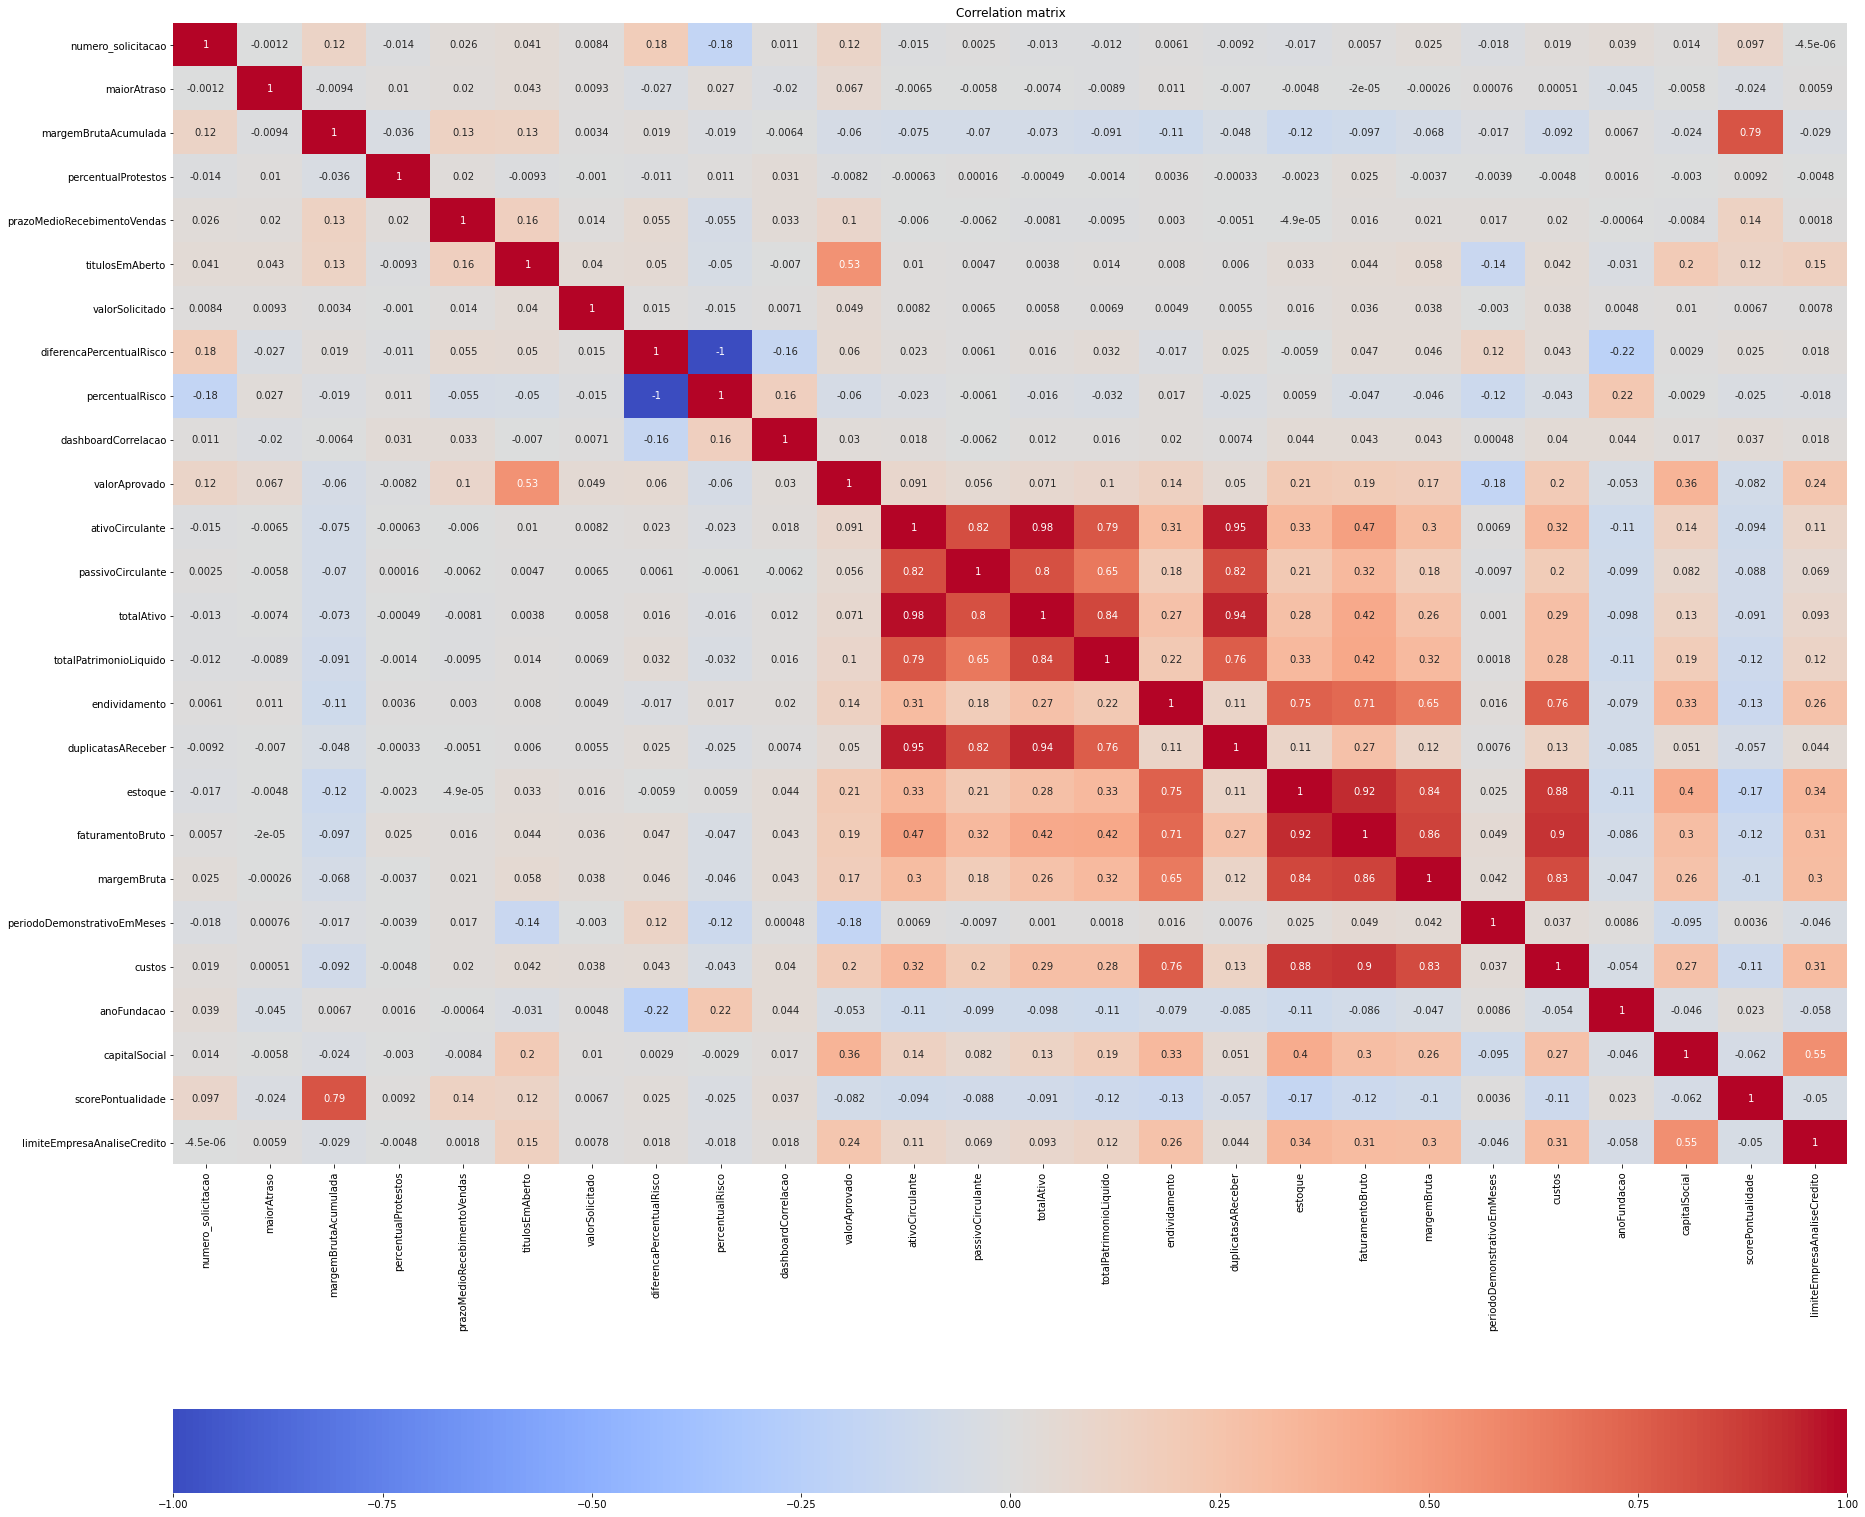

In [283]:
plt.figure(figsize=(30,30)) 
print(sbs.heatmap(dfo.corr(), annot=True, cmap="coolwarm",cbar_kws= {'orientation': 'horizontal'}),"\n")
plt.title('Correlation matrix')

In [76]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   numero_solicitacao           8973 non-null   int64  
 1   razaoSocial                  8973 non-null   object 
 2   nomeFantasia                 8973 non-null   object 
 3   cnpjSemTraco                 8973 non-null   object 
 4   maiorAtraso                  8973 non-null   int64  
 5   margemBrutaAcumulada         8973 non-null   float64
 6   percentualProtestos          7475 non-null   float64
 7   primeiraCompra               8867 non-null   object 
 8   prazoMedioRecebimentoVendas  8973 non-null   int64  
 9   titulosEmAberto              8973 non-null   float64
 10  valorSolicitado              8973 non-null   float64
 11  status                       8973 non-null   object 
 12  definicaoRisco               8973 non-null   object 
 13  diferencaPercentua

In [77]:
#verificando quantos sao os missings
dfo.isnull().sum().sort_values(ascending=True)

numero_solicitacao                0
scorePontualidade                 0
dashboardCorrelacao               0
percentualRisco                   0
definicaoRisco                    0
status                            0
valorSolicitado                   0
titulosEmAberto                   0
diferencaPercentualRisco          0
margemBrutaAcumulada              0
maiorAtraso                       0
cnpjSemTraco                      0
nomeFantasia                      0
razaoSocial                       0
prazoMedioRecebimentoVendas       0
primeiraCompra                  106
anoFundacao                     745
intervaloFundacao               745
capitalSocial                   745
restricoes                      745
limiteEmpresaAnaliseCredito     745
empresa_MeEppMei                745
faturamentoBruto                750
custos                          750
periodoDemonstrativoEmMeses     750
margemBruta                     750
valorAprovado                  1404
percentualProtestos         

In [78]:
#verificando a correlação com os campos de valor aprovado que é a nossa variavel de interesse.
#Vamos focar nessas variaveis
print(round(dfo.corr(method='pearson')["valorAprovado"]*100,2).sort_values(ascending=False),'\n')

valorAprovado                  100.00
titulosEmAberto                 53.13
capitalSocial                   35.53
limiteEmpresaAnaliseCredito     24.08
estoque                         20.53
custos                          19.95
faturamentoBruto                18.83
margemBruta                     17.35
endividamento                   14.17
numero_solicitacao              11.68
totalPatrimonioLiquido          10.15
prazoMedioRecebimentoVendas      9.96
ativoCirculante                  9.08
totalAtivo                       7.07
maiorAtraso                      6.71
diferencaPercentualRisco         6.03
passivoCirculante                5.61
duplicatasAReceber               4.98
valorSolicitado                  4.89
dashboardCorrelacao              3.04
percentualProtestos             -0.82
anoFundacao                     -5.27
margemBrutaAcumulada            -5.98
percentualRisco                 -6.03
scorePontualidade               -8.16
periodoDemonstrativoEmMeses    -18.25
Name: valorA

In [79]:
#entendendo o score de pontualidade que parece ser uma variavle importante para o negocio quando falamos de credito
print(round(dfo.corr(method='pearson')["scorePontualidade"]*100,2).sort_values(ascending=False),'\n')

scorePontualidade              100.00
margemBrutaAcumulada            79.24
prazoMedioRecebimentoVendas     14.00
titulosEmAberto                 12.02
numero_solicitacao               9.68
dashboardCorrelacao              3.67
diferencaPercentualRisco         2.49
anoFundacao                      2.31
percentualProtestos              0.92
valorSolicitado                  0.67
periodoDemonstrativoEmMeses      0.36
maiorAtraso                     -2.44
percentualRisco                 -2.49
limiteEmpresaAnaliseCredito     -4.98
duplicatasAReceber              -5.69
capitalSocial                   -6.22
valorAprovado                   -8.16
passivoCirculante               -8.77
totalAtivo                      -9.10
ativoCirculante                 -9.41
margemBruta                    -10.04
custos                         -11.42
totalPatrimonioLiquido         -11.62
faturamentoBruto               -12.16
endividamento                  -13.12
estoque                        -16.59
Name: scoreP

In [80]:
#Vendo quantas solicitações são zero
dfo.groupby("scorePontualidade",as_index=False).agg({"numero_solicitacao":"count"}).sort_values(by=["numero_solicitacao"],ascending= False)

,scorePontualidade,numero_solicitacao
384,1.000000,5594
0,0.000000,1556
126,0.830644,21
347,0.994786,16
364,0.998127,16
...,...,...
211,0.924353,1
65,0.669327,1
185,0.898922,1
134,0.839977,1


In [81]:
#vendo as correlações com o percentuial de protestos
print(round(dfo.corr(method='pearson')["percentualProtestos"]*100,2).sort_values(ascending=False),'\n')

percentualProtestos            100.00
dashboardCorrelacao              3.14
faturamentoBruto                 2.45
prazoMedioRecebimentoVendas      1.99
percentualRisco                  1.13
maiorAtraso                      1.00
scorePontualidade                0.92
endividamento                    0.36
anoFundacao                      0.16
passivoCirculante                0.02
duplicatasAReceber              -0.03
totalAtivo                      -0.05
ativoCirculante                 -0.06
valorSolicitado                 -0.10
totalPatrimonioLiquido          -0.14
estoque                         -0.23
capitalSocial                   -0.30
margemBruta                     -0.37
periodoDemonstrativoEmMeses     -0.39
limiteEmpresaAnaliseCredito     -0.48
custos                          -0.48
valorAprovado                   -0.82
titulosEmAberto                 -0.93
diferencaPercentualRisco        -1.13
numero_solicitacao              -1.40
margemBrutaAcumulada            -3.64
Name: percen

In [82]:
dfo.groupby("percentualProtestos",as_index=False).agg({"numero_solicitacao":"count"}).sort_values(by=["numero_solicitacao"],ascending= False)

,percentualProtestos,numero_solicitacao
0,0.000000,7452
8,15.298110,5
1,0.495062,3
2,0.590746,3
3,0.955608,3
4,1.702576,3
5,3.035995,3
6,3.387862,1
7,6.769564,1
9,36.983728,1


In [83]:
dfo[["scorePontualidade","percentualProtestos"]].corr()

,scorePontualidade,percentualProtestos
scorePontualidade,1.000000,0.009248
percentualProtestos,0.009248,1.000000


In [84]:
dfo.groupby("status").agg({"cnpjSemTraco":"count"})

,cnpjSemTraco
status,
AguardandoAprovacao,1
AprovadoAnalista,7011
AprovadoComite,558
DocumentacaoReprovada,504
EmAnaliseDocumentacao,289
ReprovadoAnalista,590
ReprovadoComite,20


In [85]:
dfo.empresa_MeEppMei.value_counts()

False    5046
True     3182
Name: empresa_MeEppMei, dtype: int64

In [86]:
dfo.groupby("status").agg({"cnpjSemTraco":"count"})


,cnpjSemTraco
status,
AguardandoAprovacao,1
AprovadoAnalista,7011
AprovadoComite,558
DocumentacaoReprovada,504
EmAnaliseDocumentacao,289
ReprovadoAnalista,590
ReprovadoComite,20


In [87]:
dfo[(dfo["percentualProtestos"]>15)]

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,definicaoRisco,diferencaPercentualRisco,percentualRisco,dashboardCorrelacao,valorAprovado,dataAprovadoEmComite,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,totalPatrimonioLiquido,endividamento,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
236,245,Gemma Charlton,Lydia Morrison,VSWM57040130755217,21,0.294314,15.298110,2019-08-09T00:00:00,107,0.0,20000.0,ReprovadoAnalista,De 31 a 50 % - Médio,0.641509,0.358491,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229996561.0,0.0,5.0,0.0,1998.0,Acima de 17 anos,100000.0,True,False,1.0,136500.0,NaN
563,581,Gemma Charlton,Lydia Morrison,VSWM57040130755217,21,0.294314,15.298110,2019-08-09T00:00:00,107,0.0,20000.0,AprovadoAnalista,De 31 a 50 % - Médio,0.660377,0.339623,0.866025,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229996561.0,0.0,5.0,0.0,1998.0,Acima de 17 anos,100000.0,True,False,1.0,136500.0,2020-02-21T17:53:15
3722,3795,Gemma Charlton,Lydia Morrison,VSWM57040130755217,21,0.294314,15.298110,2019-08-09T00:00:00,107,0.0,20000.0,DocumentacaoReprovada,De 0 a 10 % - Muito Baixo,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3723,3796,Gemma Charlton,Lydia Morrison,VSWM57040130755217,21,0.294314,15.298110,2019-08-09T00:00:00,107,0.0,20000.0,DocumentacaoReprovada,De 0 a 10 % - Muito Baixo,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
4226,4299,Gemma Charlton,Lydia Morrison,VSWM57040130755217,21,0.294314,15.298110,2019-08-09T00:00:00,107,0.0,20000.0,AprovadoAnalista,De 11 a 30 % - Baixo,0.732143,0.267857,0.866025,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,925011533.0,0.0,12.0,0.0,1998.0,Acima de 17 anos,100000.0,False,False,1.0,20400.0,2020-08-20T21:32:31
4684,4757,Ms. Linda Perry,Allan Morgan,TNLX82743930065734,63,0.172341,36.983728,2018-11-29T00:00:00,0,0.0,45000.0,AprovadoAnalista,De 31 a 50 % - Médio,0.535714,0.464286,0.866025,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6908692.0,0.0,12.0,0.0,2017.0,De 0 a 5 anos,200000.0,False,True,1.0,2160.0,2020-09-09T18:30:33


* correlacao entre endividamento e estoque

In [88]:
dfo[["endividamento","estoque"]].corr()

,endividamento,estoque
endividamento,1.00000,0.74646
estoque,0.74646,1.00000


In [217]:
pd.options.display.float_format = "{:.3f}".format

dfo.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
numero_solicitacao,8973.000,4550.042,2603.486,1.000,2316.000,4559.000,6802.000,9045.000
maiorAtraso,8973.000,24.643,66.181,0.000,3.000,6.000,22.000,1265.000
margemBrutaAcumulada,8973.000,0.362,0.201,0.000,0.281,0.403,0.508,1.000
percentualProtestos,7475.000,0.019,0.594,0.000,0.000,0.000,0.000,36.984
prazoMedioRecebimentoVendas,8973.000,23.083,68.178,0.000,0.000,0.000,30.000,1605.000
titulosEmAberto,8973.000,64871.006,248285.153,0.000,0.000,0.000,17250.000,3938589.700
valorSolicitado,8973.000,749243.588,22618752.862,100.000,25000.000,50000.000,120000.000,1500000000.000
status,8973.000,0.844,0.363,0.000,1.000,1.000,1.000,1.000
diferencaPercentualRisco,8973.000,0.750,0.146,0.208,0.643,0.750,0.857,1.000
percentualRisco,8973.000,0.250,0.146,0.000,0.143,0.250,0.357,0.792


## **2.Resolvendo os missing e normalizando**

In [228]:
#Copiando dataset 
df=dfo.copy()

* *definicao de risco*

In [229]:
df.definicaoRisco.value_counts()

De 11 a 30 % - Baixo         4486
De 31 a 50 % - Médio         2509
De 0 a 10 % - Muito Baixo    1590
De 51 a 80 % - Alto           388
Name: definicaoRisco, dtype: int64

In [230]:
df["definicaoRisco"]= np.where(df["definicaoRisco"]=="De 0 a 10 % - Muito Baixo",1,df["definicaoRisco"])
df["definicaoRisco"]= np.where(df["definicaoRisco"]=="De 11 a 30 % - Baixo",2,df["definicaoRisco"])
df["definicaoRisco"]= np.where(df["definicaoRisco"]=="De 31 a 50 % - Médio",3,df["definicaoRisco"])
df["definicaoRisco"]= np.where(df["definicaoRisco"]=="De 51 a 80 % - Alto",4,df["definicaoRisco"])
df["definicaoRisco"]=np.int64(df["definicaoRisco"])

* *Valor aprovado*

*se o valor aprovado for zero ou nulo consideramos zero*

In [231]:
df["valorAprovado"]=np.where((df["valorAprovado"]<0) | (df["valorAprovado"].isnull()), 0,df["valorAprovado"])

In [232]:
df["valorAprovado"].isnull().sum()

0

* *Status*

In [233]:
df["status"]=np.where((df["status"]=="AprovadoAnalista") | (df["status"]=="AprovadoComite"), 1,0)

In [234]:
df.status.value_counts()

1    7569
0    1404
Name: status, dtype: int64

* *empresa MeEppMei*

In [235]:
#Dummy na coluna de tipo de empresa
df["empresa_MeEppMei"]=np.where((df["empresa_MeEppMei"]==True), 1,0)

In [236]:
df.empresa_MeEppMei.value_counts()

0    5791
1    3182
Name: empresa_MeEppMei, dtype: int64

* *Retirando os campos de interesse*

In [284]:
df1 = df[["cnpjSemTraco",
          "numero_solicitacao",
          "titulosEmAberto",
          "capitalSocial",
          #"limiteEmpresaAnaliseCredito",
          "valorAprovado",
          #"valorSolicitado",
          "status",
          "estoque",
          "custos",
          "faturamentoBruto",
          "endividamento",
          "totalPatrimonioLiquido",
          "scorePontualidade",
          "margemBrutaAcumulada",
          "prazoMedioRecebimentoVendas",
          #"empresa_MeEppMei",
          "definicaoRisco"
          ]].copy()

In [263]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cnpjSemTraco                 8973 non-null   object 
 1   numero_solicitacao           8973 non-null   int64  
 2   titulosEmAberto              8973 non-null   float64
 3   capitalSocial                8228 non-null   float64
 4   valorAprovado                8973 non-null   float64
 5   status                       8973 non-null   int64  
 6   estoque                      4733 non-null   float64
 7   custos                       8223 non-null   float64
 8   faturamentoBruto             8223 non-null   float64
 9   endividamento                4733 non-null   float64
 10  totalPatrimonioLiquido       4733 non-null   float64
 11  scorePontualidade            8973 non-null   float64
 12  margemBrutaAcumulada         8973 non-null   float64
 13  prazoMedioRecebime

* *Removendo valores negativos*

In [285]:
cols = ["titulosEmAberto",
          "capitalSocial",
          "valorAprovado",
          "status",
          "estoque",
          "custos",
          "faturamentoBruto",
          "endividamento",
          "totalPatrimonioLiquido",
          "scorePontualidade",
          "margemBrutaAcumulada",
          "prazoMedioRecebimentoVendas",
          "definicaoRisco"]

df1[cols] = df1[df1[cols] >= 0][cols]
#df2=df1[(df1[1,2,3,4,5,6,7,8,9,10,11,12,13] > 0).all(1)]


In [286]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cnpjSemTraco                 8973 non-null   object 
 1   numero_solicitacao           8973 non-null   int64  
 2   titulosEmAberto              8973 non-null   float64
 3   capitalSocial                8228 non-null   float64
 4   valorAprovado                8973 non-null   float64
 5   status                       8973 non-null   int64  
 6   estoque                      4730 non-null   float64
 7   custos                       8195 non-null   float64
 8   faturamentoBruto             8223 non-null   float64
 9   endividamento                4733 non-null   float64
 10  totalPatrimonioLiquido       4537 non-null   float64
 11  scorePontualidade            8973 non-null   float64
 12  margemBrutaAcumulada         8973 non-null   float64
 13  prazoMedioRecebime

* *endividamento, estoque, faturamento bruto,margem bruta, custo, capital social e empresa MEI*

In [287]:
#pega a lista dos clientes apenas
client=df1.cnpjSemTraco.unique()
client[5]

'KAYS53232027306925'

In [288]:
#ordena o dataframe por numero de solicitação
df1 = df1.sort_values(by="numero_solicitacao")

In [289]:
#Faremos uma tentativa de preenchimeno dos missings para alguns campos.
df2=[]
#loop por cada cliente
for k in client:
  #joga no auxiliar os pedidos por cliente
  auxx = df1[df1["cnpjSemTraco"] == k].sort_values(by="numero_solicitacao", ascending=True)
  auxx['endividamento'].fillna((auxx['endividamento'].mean()), inplace=True)
  auxx['estoque'].fillna((auxx['estoque'].mean()), inplace=True)
  auxx['faturamentoBruto'].fillna((auxx['faturamentoBruto'].mean()), inplace=True)
  auxx['margemBrutaAcumulada'].fillna((auxx['margemBrutaAcumulada'].mean()), inplace=True)
  auxx['custos'].fillna((auxx['custos'].mean()), inplace=True)
  auxx['totalPatrimonioLiquido'].fillna((auxx['totalPatrimonioLiquido'].mean()), inplace=True)
  auxx['capitalSocial'].fillna((auxx['capitalSocial'].mean()), inplace=True)
  auxx['valorAprovado'].fillna((auxx['valorAprovado'].mean()), inplace=True)
  #auxx['valorSolicitado'].fillna((auxx['valorSolicitado'].mean()), inplace=True)
  #auxx['limiteEmpresaAnaliseCredito'].fillna((auxx['limiteEmpresaAnaliseCredito'].mean()), inplace=True)
  
  #auxx['empresa_MeEppMei']=auxx['empresa_MeEppMei'].fillna(auxx.mode().iloc[0])
  df2.append(auxx)
  #print(k)

df2 = pd.concat(df2)

In [290]:
#Pegando um caso pontualmente para analisar, vemos boa parte dos missings desses campos nao temos como preencher pois nao há aquele dado para o cliente em questão.
df2[(df2.cnpjSemTraco=="KAYS53232027306925")]

,cnpjSemTraco,numero_solicitacao,titulosEmAberto,capitalSocial,valorAprovado,status,estoque,custos,faturamentoBruto,endividamento,totalPatrimonioLiquido,scorePontualidade,margemBrutaAcumulada,prazoMedioRecebimentoVendas,definicaoRisco
5,KAYS53232027306925,6,0.000,15000.000,20000.000,1,nan,0.000,918476.000,nan,nan,0.000,0.000,0,3
1092,KAYS53232027306925,1125,0.000,15000.000,20000.000,1,nan,0.000,918476.000,nan,nan,0.000,0.000,0,3
1096,KAYS53232027306925,1129,0.000,15000.000,20000.000,1,nan,0.000,918476.000,nan,nan,0.000,0.000,0,3
1113,KAYS53232027306925,1146,0.000,15000.000,25000.000,1,nan,0.000,918476.000,nan,nan,0.000,0.000,0,3
2661,KAYS53232027306925,2734,0.000,15000.000,20000.000,1,nan,0.000,972644.000,nan,nan,0.000,0.000,0,2
4201,KAYS53232027306925,4274,0.000,15000.000,22000.000,1,nan,0.000,972644.000,nan,nan,0.000,0.000,0,2
7650,KAYS53232027306925,7723,0.000,15000.000,22000.000,1,nan,0.000,918481.000,nan,nan,0.000,0.000,0,2


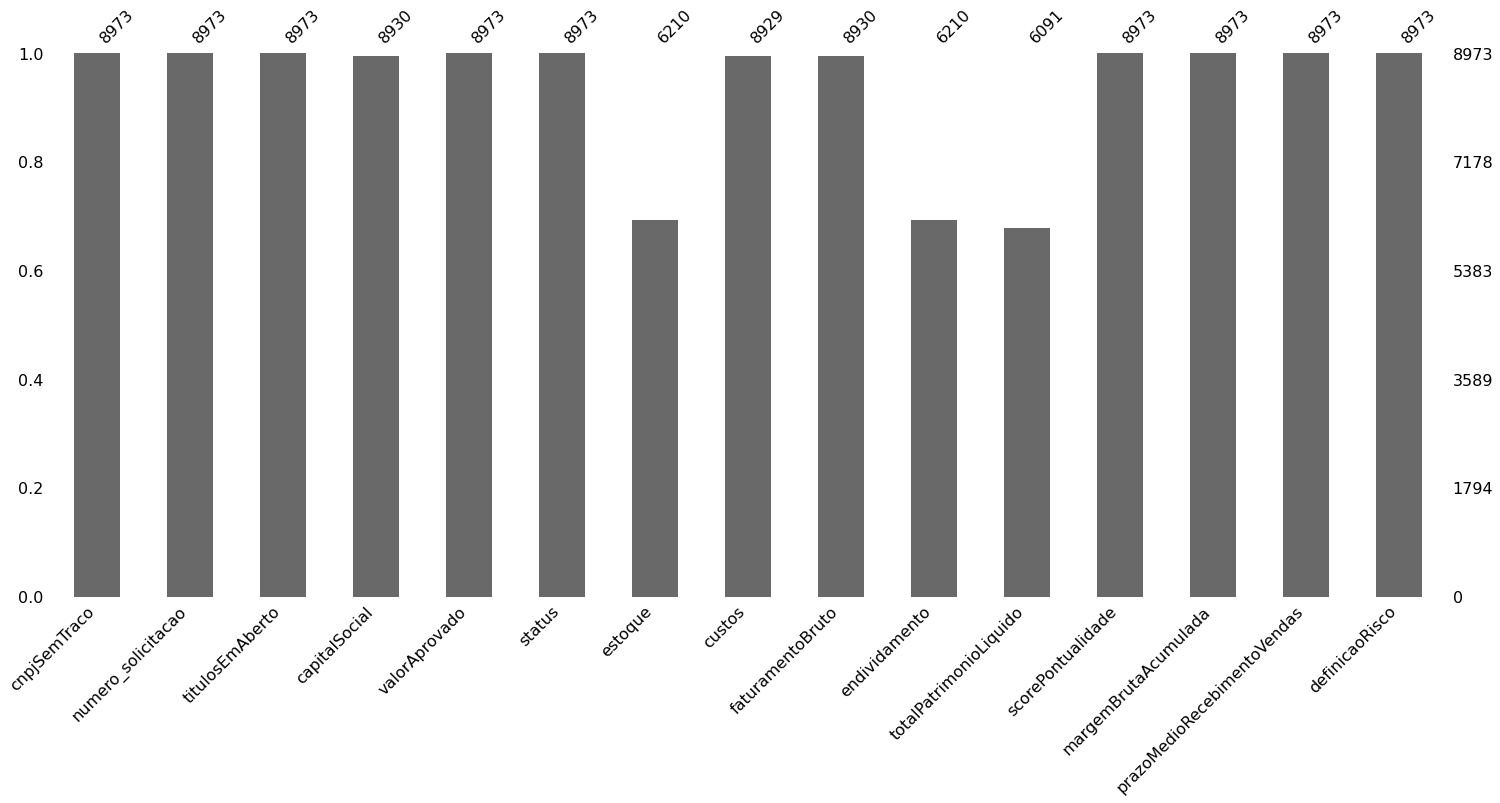

In [291]:
%matplotlib inline
msno.bar(df2)

**Conclusão**<br>
*Mesmo fazendo uma tentativa de completar os missing vemos que temos muitos campos que, para aquele cliente, nao temos a informação e assim nao conseguimos enriquecer com o proprio dado do cliente.*

## 4.Criando um novo DF

* criando o novo DF com as colunas que vamos trabalhar na clusterização

In [292]:
dfx=df2.drop("cnpjSemTraco",1)
dfx=dfx.drop("numero_solicitacao",1)

In [293]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8973 entries, 0 to 8960
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   titulosEmAberto              8973 non-null   float64
 1   capitalSocial                8930 non-null   float64
 2   valorAprovado                8973 non-null   float64
 3   status                       8973 non-null   int64  
 4   estoque                      6210 non-null   float64
 5   custos                       8929 non-null   float64
 6   faturamentoBruto             8930 non-null   float64
 7   endividamento                6210 non-null   float64
 8   totalPatrimonioLiquido       6091 non-null   float64
 9   scorePontualidade            8973 non-null   float64
 10  margemBrutaAcumulada         8973 non-null   float64
 11  prazoMedioRecebimentoVendas  8973 non-null   int64  
 12  definicaoRisco               8973 non-null   int64  
dtypes: float64(10), in

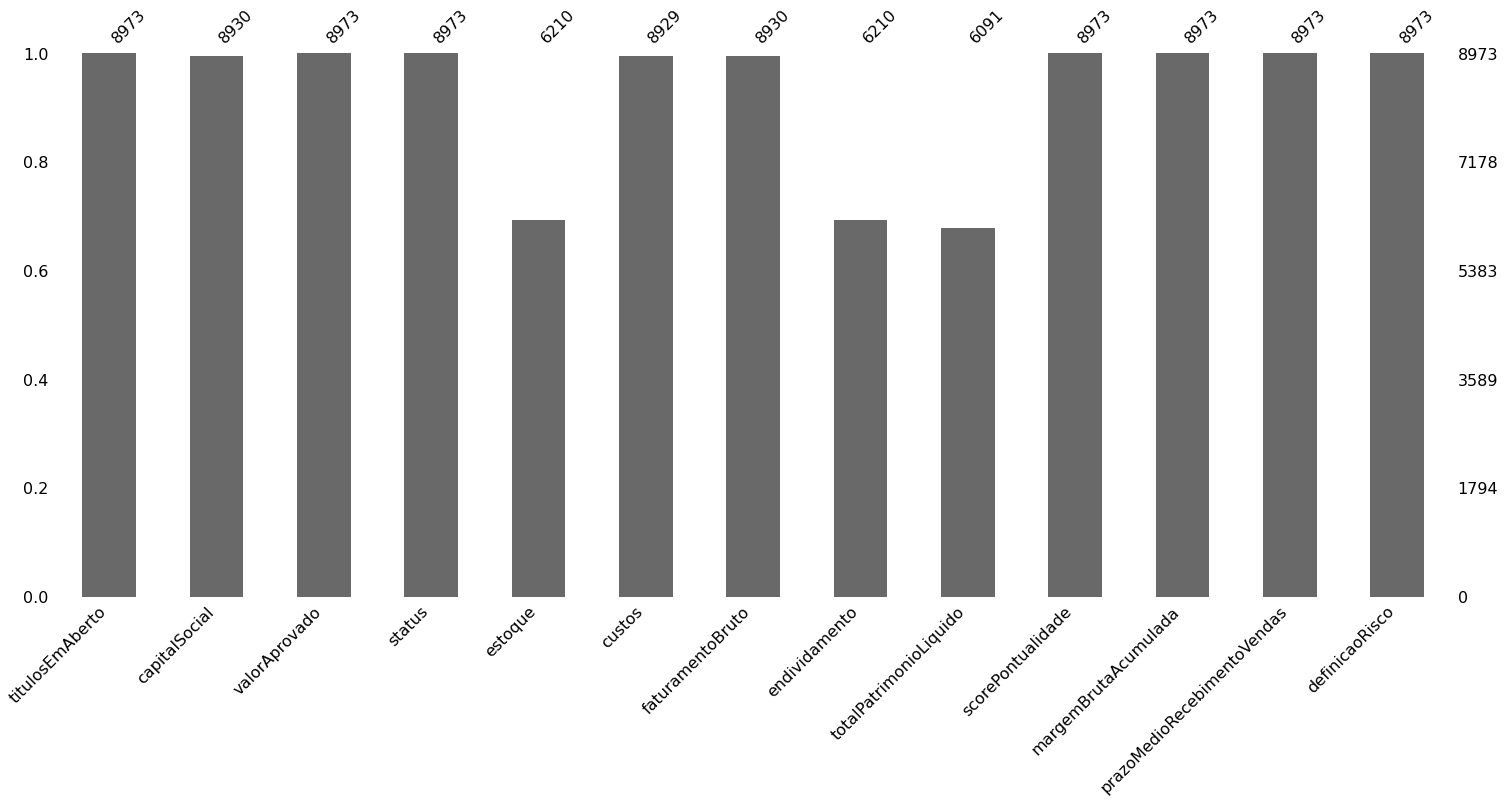

In [294]:
%matplotlib inline
msno.bar(dfx)

AxesSubplot(0.125,0.3515;0.775x0.5285) 



Text(0.5, 1.0, 'Correlation matrix')

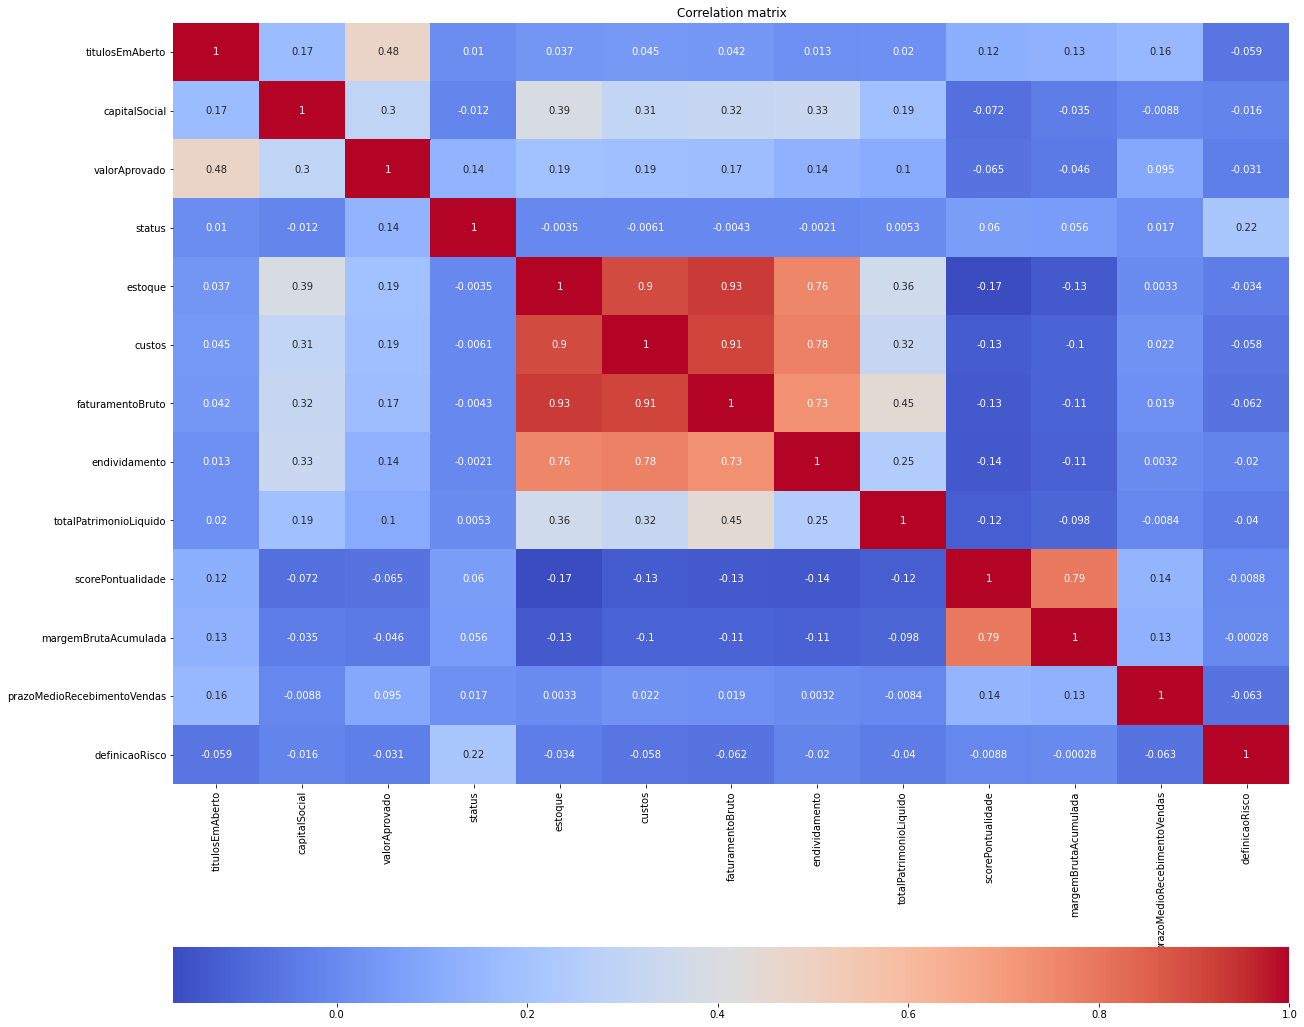

In [295]:
plt.figure(figsize=(20,20)) 
print(sbs.heatmap(dfx.corr(), annot=True, cmap="coolwarm",cbar_kws= {'orientation': 'horizontal'}),"\n")
plt.title('Correlation matrix')

In [306]:
#ultima tentativa de completar os dados e depois remover os nulos.

dfx.fillna(method ='ffill', inplace = True) 
dfx=dfx.dropna()

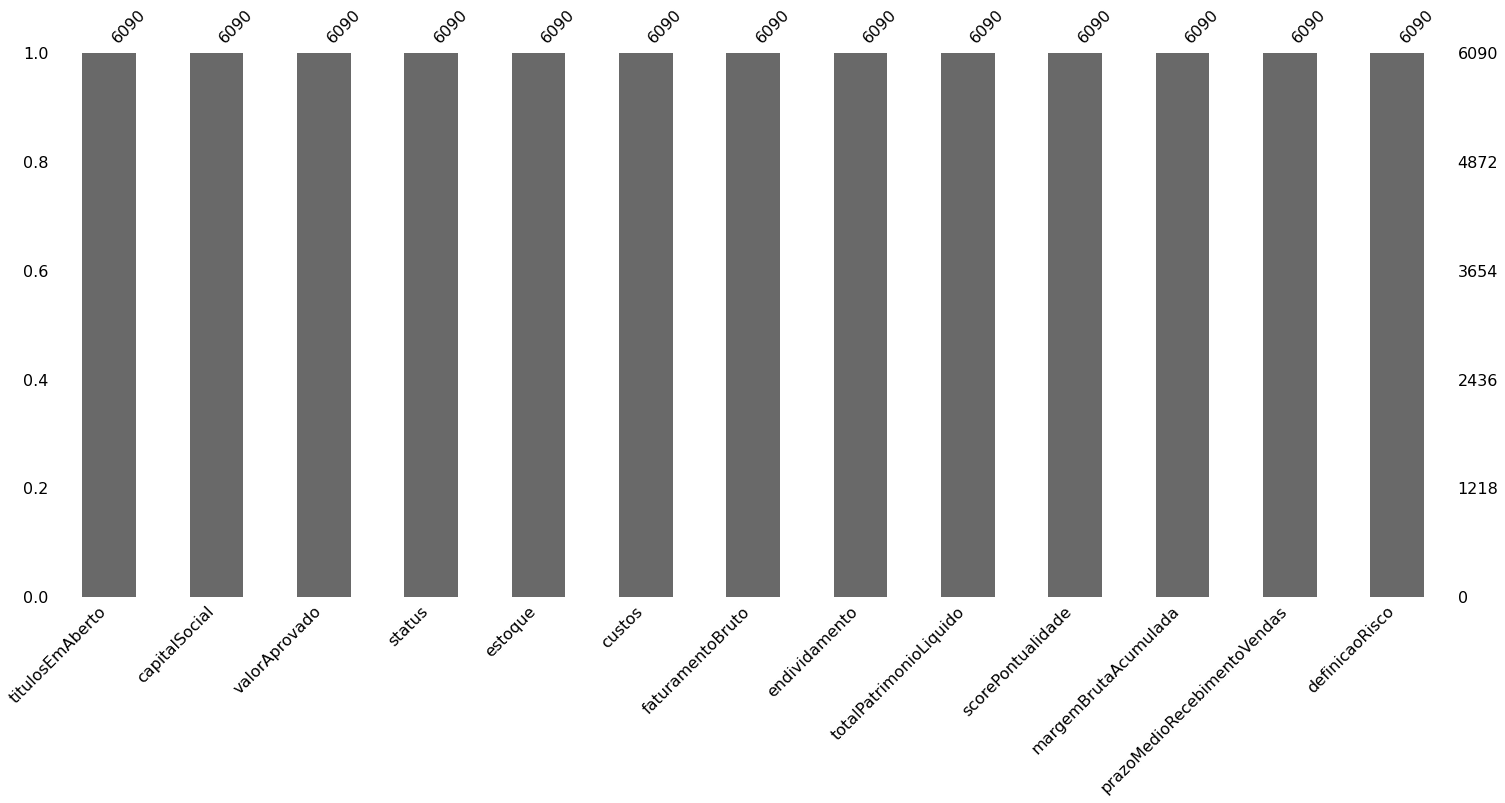

In [307]:
%matplotlib inline
msno.bar(dfx)

In [309]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6090 entries, 0 to 8960
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   titulosEmAberto              6090 non-null   float64
 1   capitalSocial                6090 non-null   float64
 2   valorAprovado                6090 non-null   float64
 3   status                       6090 non-null   int64  
 4   estoque                      6090 non-null   float64
 5   custos                       6090 non-null   float64
 6   faturamentoBruto             6090 non-null   float64
 7   endividamento                6090 non-null   float64
 8   totalPatrimonioLiquido       6090 non-null   float64
 9   scorePontualidade            6090 non-null   float64
 10  margemBrutaAcumulada         6090 non-null   float64
 11  prazoMedioRecebimentoVendas  6090 non-null   int64  
 12  definicaoRisco               6090 non-null   int64  
dtypes: float64(10), in

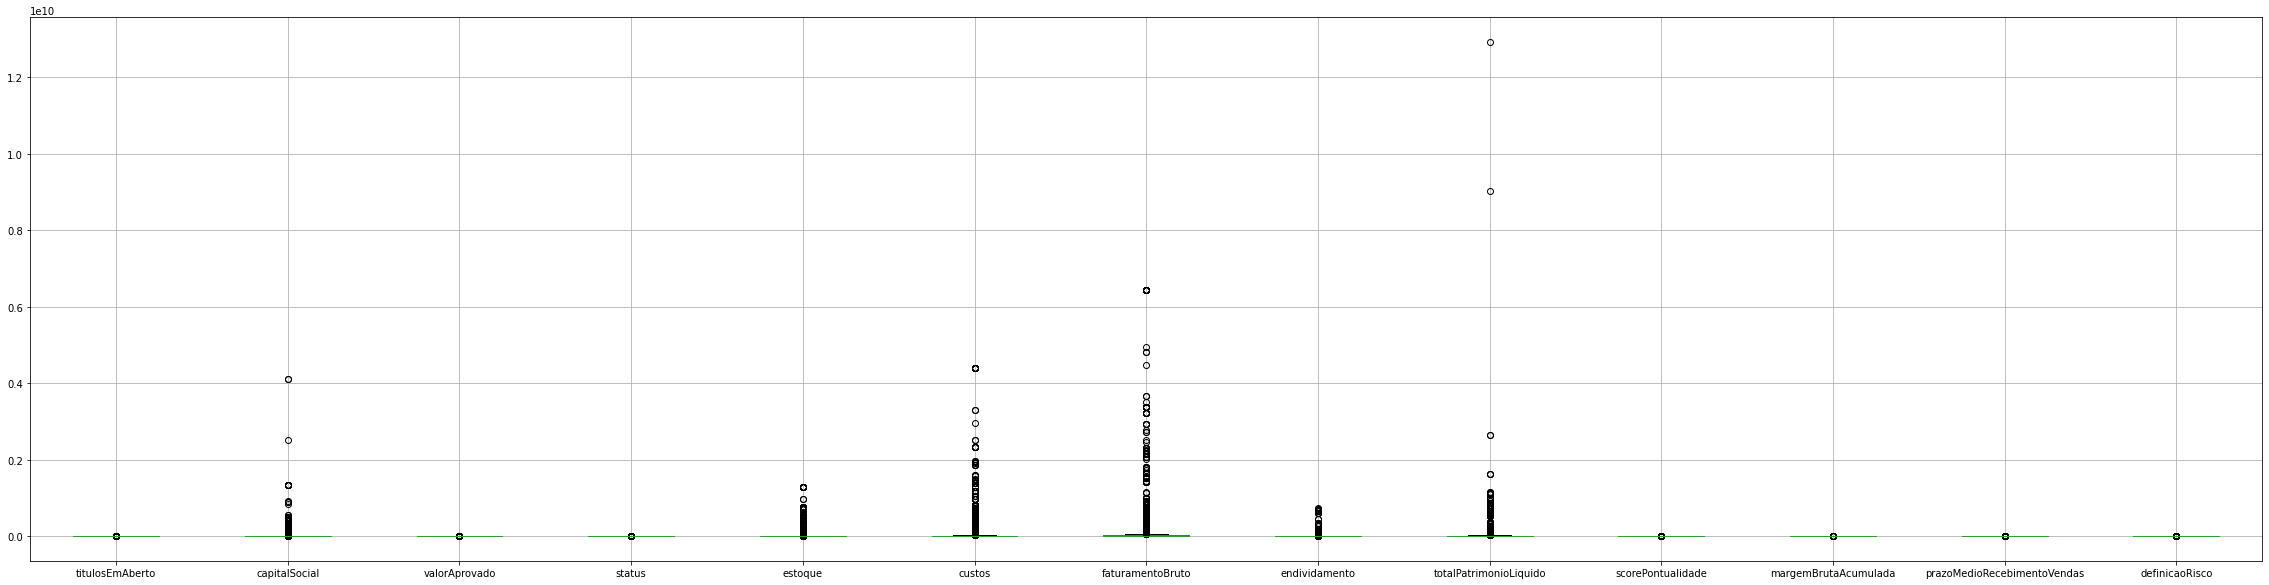

In [308]:
plt.figure(figsize=(40,10))
dfx.boxplot()

In [310]:
pd.options.display.float_format = "{:.3f}".format

dfx.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
titulosEmAberto,6090.000,84977.191,264102.363,0.000,0.000,2070.000,34849.010,2836656.000
capitalSocial,6090.000,11808192.001,107208688.637,0.000,95400.000,200000.000,800000.000,4100000000.000
valorAprovado,6090.000,198250.085,485599.067,0.000,15000.000,45000.000,150000.000,6550000.000
status,6090.000,0.844,0.363,0.000,1.000,1.000,1.000,1.000
estoque,6090.000,14032077.077,79443303.859,0.000,94739.750,895501.000,4653867.000,1293428000.000
custos,6090.000,44417768.401,256386154.621,0.000,0.000,1696956.000,12023748.591,4393536000.000
faturamentoBruto,6090.000,81885719.677,409902908.656,0.000,1882967.000,6530997.000,27087480.000,6426115000.000
endividamento,6090.000,4309573.566,35098994.473,0.000,0.000,0.000,576415.500,740631476.000
totalPatrimonioLiquido,6090.000,26033247.494,230800118.407,0.000,200678.000,1400999.000,7382989.000,12923280000.000
scorePontualidade,6090.000,0.805,0.371,0.000,0.890,1.000,1.000,1.000


## **3.Fazendo a segmentação dos clientes**

In [301]:
# separando os conjuntos
X=dfx.copy()
X=X.drop("definicaoRisco",1)
Y=dfx[["definicaoRisco"]]

In [302]:
#normaliza o dado pois o k-means eh sensivel a outlier
X_norm = StandardScaler().fit_transform(X)

In [ ]:
#Transforma o dado normalizando em dataframe

dtaux = pd.DataFrame(X_norm)
dtaux

In [315]:
#Método Elbow e silhouete para encontrar o melhor valor de k
scores = []
inertias =[]
for i in range(2, 30):
    kmeans = KMeans(n_clusters = i,max_iter=100).fit(dtaux)    
    #somatório dos erros quadráticos das instâncias de cada cluster
    inertias.append(kmeans.inertia_)
    scores.append( silhouette_score(X.values, kmeans.labels_))


* *Aplicando a curva de elbow para identificar o numero de cluster

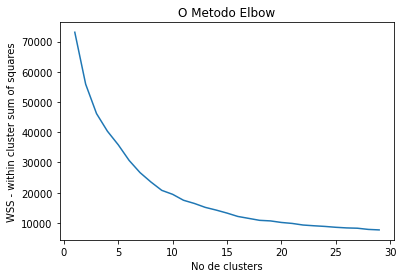

In [305]:
plt.figure(1)
plt.plot(range(1, 30), inertias)
plt.xlabel('No de clusters')
plt.ylabel('WSS - within cluster sum of squares')
plt.show()

* *Aplicado o metodo de silhouete para identificar o numero de cluster

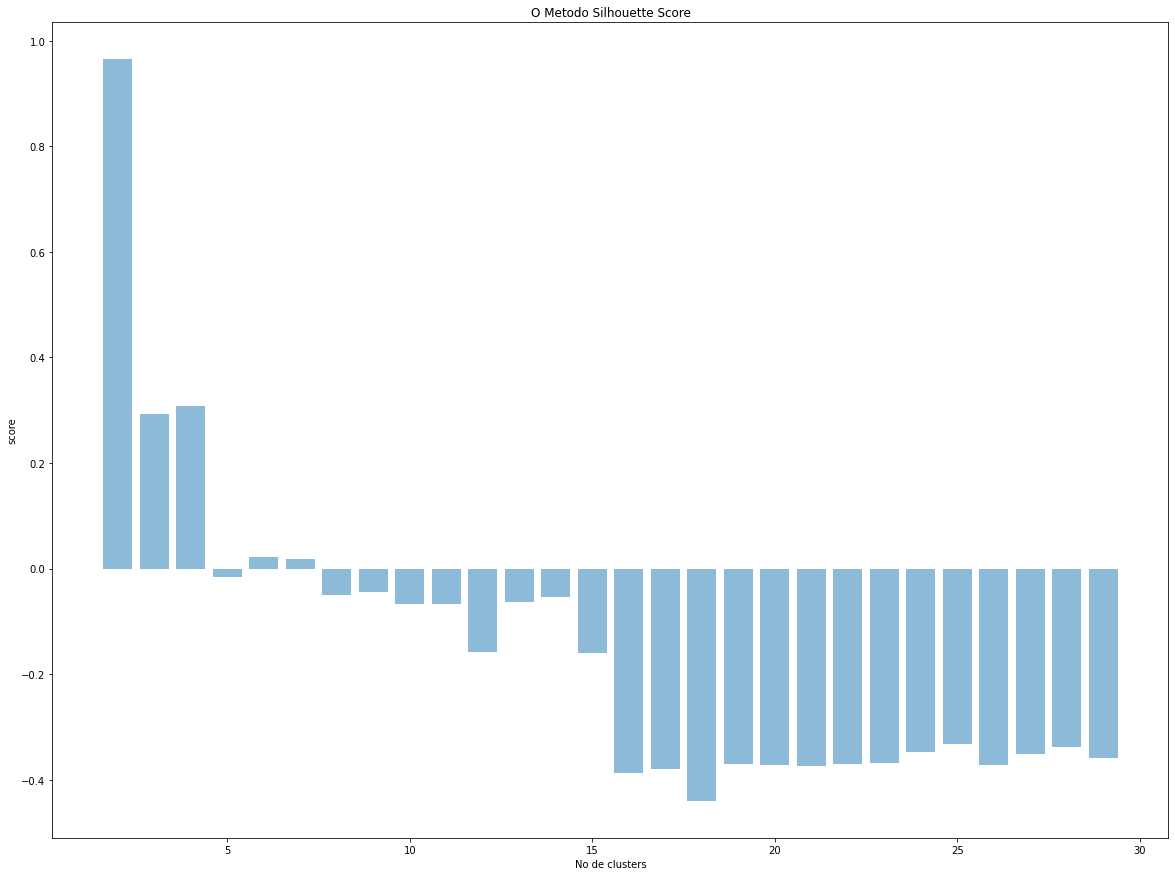

In [317]:
plt.figure(2, figsize=(20,15))
plt.bar(range(2, 30), scores,  align='center', alpha=0.5)
plt.title('O Metodo Silhouette Score')
plt.xlabel('No de clusters')
plt.ylabel('score')
plt.show()

In [196]:
#O melhor k é igual a 4 
clt =KMeans(n_clusters=4, random_state=0)
#kmeans4.fit(dfx)
model= clt.fit(X_norm)

In [ ]:
#Armazena o cluster encontrado no k-maens com k igual a 4
X_norm['cluster'] = model.labels_

#Converte o dataframe df_flores na matriz numpy x utilizando a propriedade values do dataFrame
#mat = dfx.values

#y = df_especies
#Converte a coluna cluster e a coluna especie do dataframe  df_especies (copiado para y) para os vetores y_kmeans e y_real
#y_kmeans = y.cluster.values
#y_real = y.especie.values

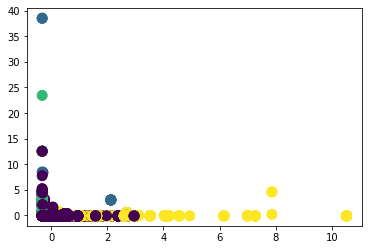

In [198]:
plt.scatter(X_norm[:, 0], X_norm[:, 1], s = 100, c = model.labels_)

In [ ]:
#Cria um vetor de cores a serem utilzados na plotagem
colormap=np.array(['Red','green','blue',"yellow"])
plt.figure(2)
#Adicona varios pontos na plotagaem utilizando as informações de sepal_Length e sepal_width como coordenadas dos pontos a serem plotados
plt.scatter(dfx.valorAprovado, dfx.status, c=colormap[dfx.definicaoRisco], s=100)
plt.title('Separação Real')
plt.show()

In [113]:
type(X_norm)

numpy.ndarray

In [ ]:
plt.figure(figsize=(20,20))
fig = px.scatter_3d(X_norm, x='valorAprovado', y='scorePontualidade', z='valorSolicitado',color="endividamento")
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),autosize=False,width=1200,height=1200,)